In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train and test Dataset
Train_data=pd.read_excel(r'E:\Python Practice\Data_Train.xlsx')

Test_data=pd.read_excel(r'E:\Python Practice\Data_Test.xlsx')

In [3]:
Train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
Test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# EDA

In [5]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
Train_data=Train_data.replace(np.NaN,0)

In [8]:
Train_data.isnull().values.any()

False

In [9]:
Train_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [11]:
#Exploring Categorical columns
for column in Train_data.columns:
    if Train_data[column].dtypes== object:
        print(str(column)+ ':' +str(Train_data[column].unique()))
        print(Train_data[column].value_counts())
        print('************************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [12]:
#dropping not useful column
Train_data.drop(['RESTAURANT_ID'], axis=1, inplace=True)

In [18]:
#Statistical Summary
Train_data.describe()

,COST
count,12690.000000
mean,655.252246
std,627.003540
min,20.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


# Visualization

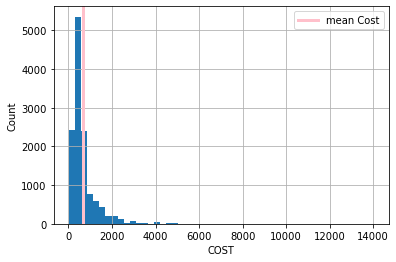

In [17]:
Fees= Train_data['COST'].hist(bins=50)
mean_val= np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=3, color='pink', label='mean Cost')
plt.xlabel('COST')
plt.ylabel('Count')
plt.legend()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
0         2
Name: RATING, dtype: int64


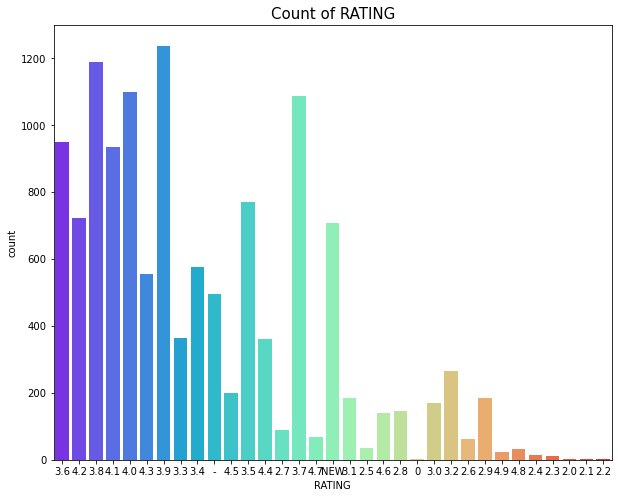

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x='RATING',data=Train_data,palette='rainbow')
plt.title('Count of RATING',fontsize=15)

print(Train_data['RATING'].value_counts())

In [25]:
#Extracting years of experience
Train_data["VOTES"] = Train_data["VOTES"].str.split()
Train_data["VOTES"] = Train_data["VOTES"].str[0].astype("int")

ValueError: cannot convert float NaN to integer

In [19]:
Train_data.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

In [26]:
#Extracting Cuisines

Train_data["CUISINES"] = Train_data["CUISINES"].str.split(",")
Train_data["CUISINES"] = Train_data["CUISINES"].str[-1]
Train_data["CUISINES"] = Train_data["CUISINES"].str[0]

In [28]:
#Extracting Cities

Train_data["LOCALITY"] = Train_data["LOCALITY"].str.split(",")
Train_data["LOCALITY"] = Train_data["LOCALITY"].str[-1]
Train_data["LOCALITY"] = Train_data["LOCALITY"].str[0]

In [30]:
#encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
for val in list:
    Train_data[val]=le.fit_transform(Train_data[val].astype(str))

In [31]:
Train_data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",321,13,18,1278,1200
1,33,0,6pm – 11pm (Mon-Sun),68,27,24,950,1500
2,31,0,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",68,28,20,712,800
3,95,0,11:30am – 1am (Mon-Sun),223,11,23,787,800
4,50,4,11am – 1am (Mon-Sun),223,21,20,470,300
